#Sentiment analysis of customer comments with Sequential Model
In this project, we are going to use customer comments on the IMDB website to analyze sentiments and see if a user's opinion on a movie is positive or negative.

The link to the data page on the Keggle website: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

##import library and dataset

To perform this analysis, we need these libraries:

1. **pandas (pd):** for working with tabular data (CSV file) and performing data processing operations.
2. **tensorflow (tf):** for building, training, and evaluating deep learning models.
3. **scikit-learn:** for splitting data into training and test data, as well as creating confusion matrices and evaluating model performance.
4. **keras.preprocessing.text.Tokenizer:** to convert texts into sequence of integers for model input. **Tokenizer** is a tool of the keras infrastructure that simply enables the conversion of texts into sequences of integers.
5. **keras.preprocessing.sequence.pad_sequences:** to preprocess model input data and set input vectors to equal length. pad_sequences is also a tool of keras infrastructure, which is used for preprocessing sequences and setting their same length.
6. **keras.models.Sequential:** for the structure of models layer by layer (sequential), which are added sequentially. Sequential is a model type in keras that easily adds layers sequentially.
7. **keras.layers.Embedding, keras.layers.LSTM, keras.layers.Dense:** To add Embedding, LSTM and Dense layers to the model. These layers use the keras infrastructure and are used to build the deep learning structure of the models.
8. **matplotlib.pyplot (plt):** for drawing graphs and displaying evaluation results. matplotlib is a graphics library that allows drawing graphs and various images.

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Load the IMDb dataset
dataset_url = '/content/drive/MyDrive/ml/Sentiment-analysis-of-customer-comments/IMDB Dataset.csv'
df = pd.read_csv(dataset_url)

In [2]:
print(df.head(5))
df.info()
df.describe()

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production.  The filming te...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
count,50000,50000
unique,49581,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


##Preprocess the Data
In this step, the data is prepared to enter the model. This stage includes several important steps:

1. **OOV (Out-Of-Vocabulary):** OOV is used as an abbreviation of Out-Of-Vocabulary and refers to words or tokens that did not exist in the training stage of the model (fitting) and were not recognized in the training dataset. If a word or token does not exist in the model training phase (OOV), the OOV-specific token is used.
2. **Tokenizer:** This step is done to convert texts into sequences of integers. First, an instance of the Tokenizer class is created and then it is fit on the training data.
3. **texts_to_sequences:** This is the step of converting texts into sequences of numbers, where each number refers to a token (dictionary) from the dataset. Using the texts_to_sequences function, each text is converted to a numeric equivalent.
4. **pad_sequences:** Used to create a uniform length for all sequences and data preprocessing. All sequences are set to the same length (with respect to maxlen) using the pad_sequences function.

In pad_sequences function, padding and truncating parameters are used to manage the length of sequences.
1. **padding:** This parameter specifies how preprocessing should be done if the length of a sequence is shorter than maxlen. If **padding='pre'**, zeros are added to the beginning of the sequence to reach maxlen length. If **padding='post'**, zeros are added to the end of the sequence.
2. **truncating:** This parameter specifies how to deal with sequences that are longer than maxlen. If **truncating='pre'**, elements are removed from the beginning of the sequence until it reaches maxlen length. If **truncating='post'**, elements are removed from the end of the sequence.

In [3]:
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(df['review'])

X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=max_length, padding=padding_type, truncating=trunc_type)

###Convert Label (sentiment) to one-hot encoding
In classification problems, we usually deal with different category labels. To use these labels in machine learning models, the One-Hot Encoding format is often used.

**What is One-Hot Encoding?** In One-Hot Encoding, each label is converted into a binary vector whose number of members is equal to the number of categories. In this vector, all values are 0 except for one value that corresponds to the real label category and is equal to 1.

the command related to One-Hot Encoding: In this project, with the pd.get_dummies command, the sentiment column is converted into two columns, negative and positive, and it is used as the output of the model for two-category classification (positive or negative).

In [4]:
y = pd.get_dummies(df['sentiment']).values

###Split the dataset into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Build the model

In this stage, i.e. the model building stage, the following tasks are performed:

1. **Sequential Model:** First, a sequential model is defined. This type of model places one layer under another layer and information is transferred from the previous layer to the next layer.

2. **Embedding Layer:** An embedding layer is added. This layer converts the text input (sequence of integers) into a continuous vector space. The input of this layer is the total number of different words in the dataset (unique number of tokens) plus one (due to indices starting from 1 in tokens) and the maximum size of tokens (max_length). Each token is converted into a 16-dimensional vector.

3. **Bidirectional LSTM Layers:** Two Bidirectional LSTM layers are added. LSTM is a type of Recurrent Neural Networks (RNNs) that is suitable for working with sequence data such as texts. Using Bidirectional, the model reads information forward and backward simultaneously and uses bidirectional information to improve performance.

4. **Dense Layers:** Two dense layers are added. The first one with 64 neurons and relu activity function and the other one with 2 neurons and softmax activity function. Softmax layer is used for multi-class classification. This layer has two neurons that deal with the number of output categories (here 2: positive and negative) and declare the probability of each category.

The commands executed in the code define this model architecture structure that can work with textual inputs (customer reviews) and produce positive or negative sentiment specification output.

In [6]:
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=16, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # 2 output nodes for binary classification (positive or negative)
])

### Compile Model

The model.compile command performs several important tasks in the model compilation phase:

1. **Determining the cost function (Loss Function):** Here, categorical_crossentropy is chosen as the cost function. This cost function is used for multi-class classification problems and usually works by using one-hot encoding of labels. This cost function calculates the cost value based on the difference between the probability distribution of the model and the actual distribution of labels.

2. **Determining the optimizer algorithm:** Here adam is used as the optimizer algorithm. The optimizer algorithm is responsible for updating the model weights in order to reduce the value of the cost function. Adam's algorithm is a very widely used gradient-to-gradient optimization algorithm.

3. **Determining the evaluation criteria (Metrics):** Here, accuracy is chosen as the evaluation criterion. This measure shows the percentage of accuracy of the model in correctly recognizing categories.

In general, this command specifies all settings related to model training and the model is ready for the training stage.

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

##Train the model

In the model training phase, a mechanism called "Early Stopping" is used to prevent the continuation of model training if the reduction is not optimal.

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True):

1. **monitor='val_loss':** Tells the model that the metric to watch to decide whether to continue training is the average cost on the validation data (val_loss).
2. **patience=3:** Determines to stop training if the value of the criterion (val_loss) does not decrease for 3 consecutive periods.
3. **restore_best_weights=True:** This option restores the model weights to the state that had better accuracy in previous periods when training is stopped.

model.fit(..., epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping]):

1. **epochs=10:** command epochs=10 determines the maximum number of training times of the model.
2. **validation_data=(X_test, y_test):** This command specifies that validation data should be used to evaluate the model. In each period of training, the model is evaluated based on these data.
3. **callbacks=[early_stopping]:** List of callbacks used to control model training. Here, early_stopping is used as a callback to stop training if necessary.
In short, this setting prevents unnecessary training of the model and stops the model when the accuracy does not improve on the validation data to avoid overfitting.

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
1250/1250 [==============================] - 521s 410ms/step - loss: 0.3987 - accuracy: 0.8178 - val_loss: 0.3120 - val_accuracy: 0.8713
Epoch 2/10
1250/1250 [==============================] - 533s 426ms/step - loss: 0.2111 - accuracy: 0.9211 - val_loss: 0.3506 - val_accuracy: 0.8524
Epoch 3/10
1250/1250 [==============================] - 532s 426ms/step - loss: 0.1295 - accuracy: 0.9545 - val_loss: 0.3522 - val_accuracy: 0.8740
Epoch 4/10
1250/1250 [==============================] - 516s 413ms/step - loss: 0.0817 - accuracy: 0.9718 - val_loss: 0.4746 - val_accuracy: 0.8674


##Evaluate the model

This step evaluates the performance of the model on the test data. This step provides important information about the accuracy and efficiency of the model.

In the given code, the command model.evaluate(X_test, y_test) is used to evaluate the model. This output command returns two values as the result of model evaluation:

1. **test_loss:** model cost on test data. This value is usually less than the cost in the training data and represents the performance of the model on new data.
2. **test_acc:** model accuracy on test data. This value indicates the accuracy percentage of the model's predictions on the test data.

With this information, it is easy to evaluate how well the model performs on new data (not seen during the model training phase). If the accuracy on the test data is very low, the model probably has problems and needs to be improved. These evaluations are important to ensure that the model is reliable and efficient.

In [9]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss * 100:.2f}%, Test Accuracy: {test_acc * 100:.2f}%")

313/313 [==============================] - 36s 115ms/step - loss: 0.3120 - accuracy: 0.8713

Test Loss: 31.20%, Test Accuracy: 87.13%


##Is it possible to calculate AUC and ROC for this project?

The sentiment analysis project of customer comments, implemented using neural networks, is a two-class (positive and negative) classification problem. For this reason, you can use the operating characteristic curve (ROC) and the area under the operating characteristic curve (AUC) to evaluate the accuracy of the model.

To calculate AUC and ROC in TensorFlow, we can use the scikit-learn library. First, we use the predict function of the model on the test data to obtain the prediction probabilities for each class, then we use these probabilities to calculate ROC and AUC.

Here, y_test[:, 1] represents the actual labels corresponding to the positive class in the test data. y_probs[:, 1] also corresponds to the model prediction probabilities for the positive class. AUC is equal to the area under the ROC curve and we can use this value as an evaluation criterion for the model.

313/313 [==============================] - 27s 82ms/step


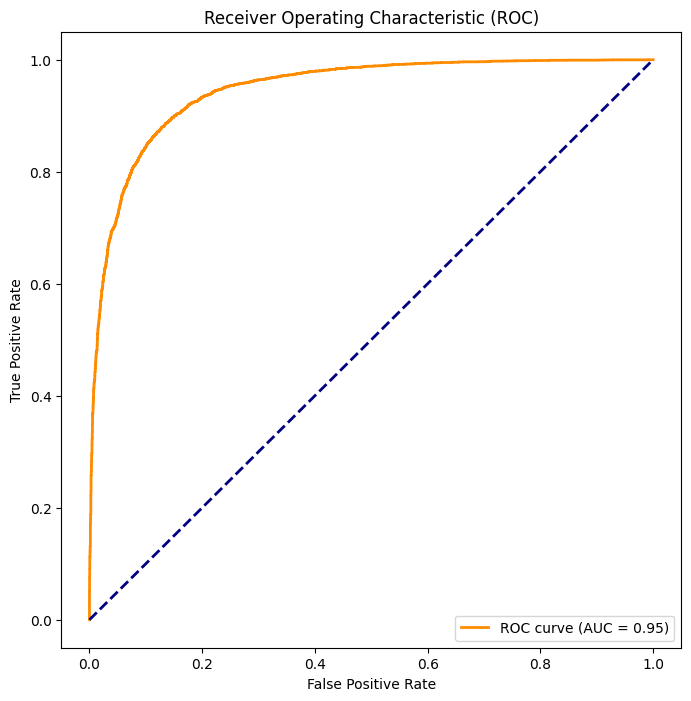

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities on test data
y_probs = model.predict(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

##Is it possible to calculate F1 Score, Recall and Precision for this project?

Yes, you can use metrics like F1 Score, Recall, and Precision to evaluate model performance in your sentiment analysis project. These metrics are especially useful in two-class (positive and negative) classification problems.

We define the following variables:

TP (True Positive): The number of samples correctly identified as positive by the model.
TN (True Negative): The number of samples correctly identified as negative by the model.
FP (False Positive): The number of samples that the model incorrectly recognized as positive.
FN (False Negative): The number of samples that the model incorrectly identified as negative.
Then from these variables, you can calculate the following criteria:

1. **Precision:** TP/(TP+FP)
2. **Recall (reading or sensitivity):** TP/(TP+FN)
3. **F1 Score:** (2 x Precision x Recall)/(Precision + Recall)

To calculate these metrics in Python, we use the scikit-learn library.

First, using the model, the prediction probabilities are calculated for the test data. Then, using argmax , the predicted class for each instance is obtained. (Predict classes on test data)

Also, real tags encoded in one-hot format are converted into classes. This is done using argmax on the columns axis. (Convert one-hot encoded y_test to classes)

Finally, the criteria of precision, recall and F1-score from the scikit-learn library are used to evaluate the performance of the model. (Calculate Precision, Recall, and F1 Score)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict classes on test data
y_pred_probs = model.predict(X_test)
y_pred_classes = y_pred_probs.argmax(axis=1)


# Convert one-hot encoded y_test to classes
y_true_classes = y_test.argmax(axis=1)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_true_classes, y_pred_classes)
recall = recall_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes)

print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1 Score: {:.4f}'.format(f1))

313/313 [==============================] - 26s 84ms/step
Precision: 0.8927
Recall: 0.8504
F1 Score: 0.8710


##Predict a New Sample

In [13]:
# Create a new comment
#new_review = ["This movie was amazing! The plot was captivating, and the acting was superb. I highly recommend it."]

#new_review = ["The movie was very stupid. It didn't help at all and had no content. The picture and sound quality was very low."]

new_review =["The movie was very nice, but the ending was not good."]

# preprocessing
new_review_sequence = tokenizer.texts_to_sequences(new_review)
new_review_padded = pad_sequences(new_review_sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# predic sense
prediction = model.predict(new_review_padded)

# Predict interpretation
if prediction[0, 0] > prediction[0, 1]:
    sentiment = "Negative"
else:
    sentiment = "Positive"

# show predict
print("Review:", new_review[0])
print("Predicted Sentiment:", sentiment)

1/1 [==============================] - 0s 49ms/step
Review: The movie was very nice, but the ending was not good.
Predicted Sentiment: Positive
